In [89]:
"""
Import all necessary libraries for data analysis, visualization, and machine learning.
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
"""
Load the housing dataset from CSV file and display the first few rows.
"""
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [91]:
"""
Check for missing values in each column of the dataset.
"""
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [92]:
"""
Drop rows with missing values and display DataFrame information.
"""
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [93]:
"""
Split the dataset into features (X) and target variable (y).
"""
from sklearn.model_selection import train_test_split

X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [94]:
"""
Split the data into training and testing sets for model validation.
"""
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [95]:
"""
Combine training features and target for exploratory data analysis (EDA).
"""
train_data = X_train.join(y_train)
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,<1H OCEAN,227600.0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,INLAND,110400.0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,INLAND,248100.0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,<1H OCEAN,305600.0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,NEAR OCEAN,214600.0


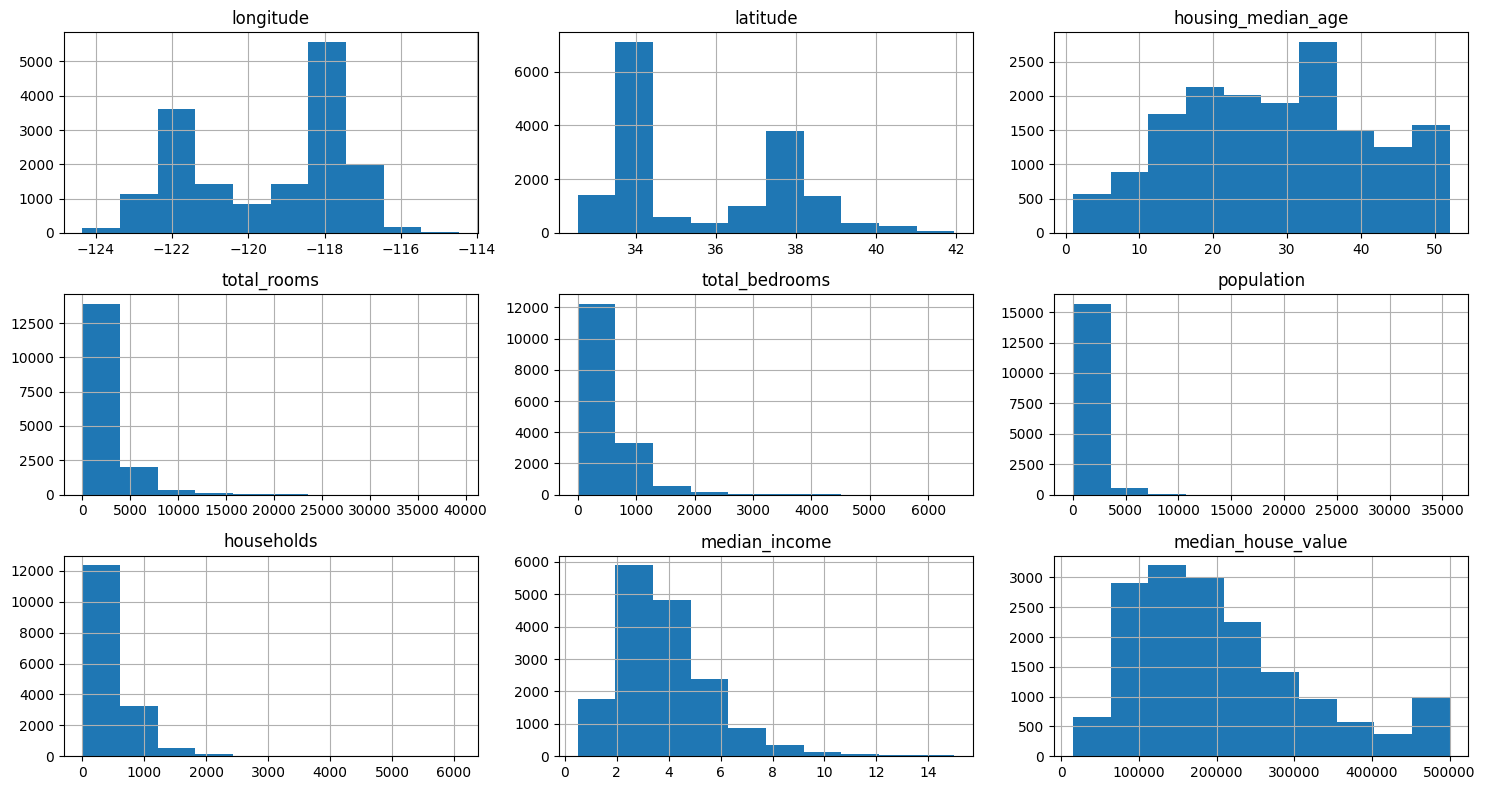

In [96]:
"""
Visualize the distributions of all features in the training data.
"""
train_data.hist(figsize=(15, 8))
plt.tight_layout()

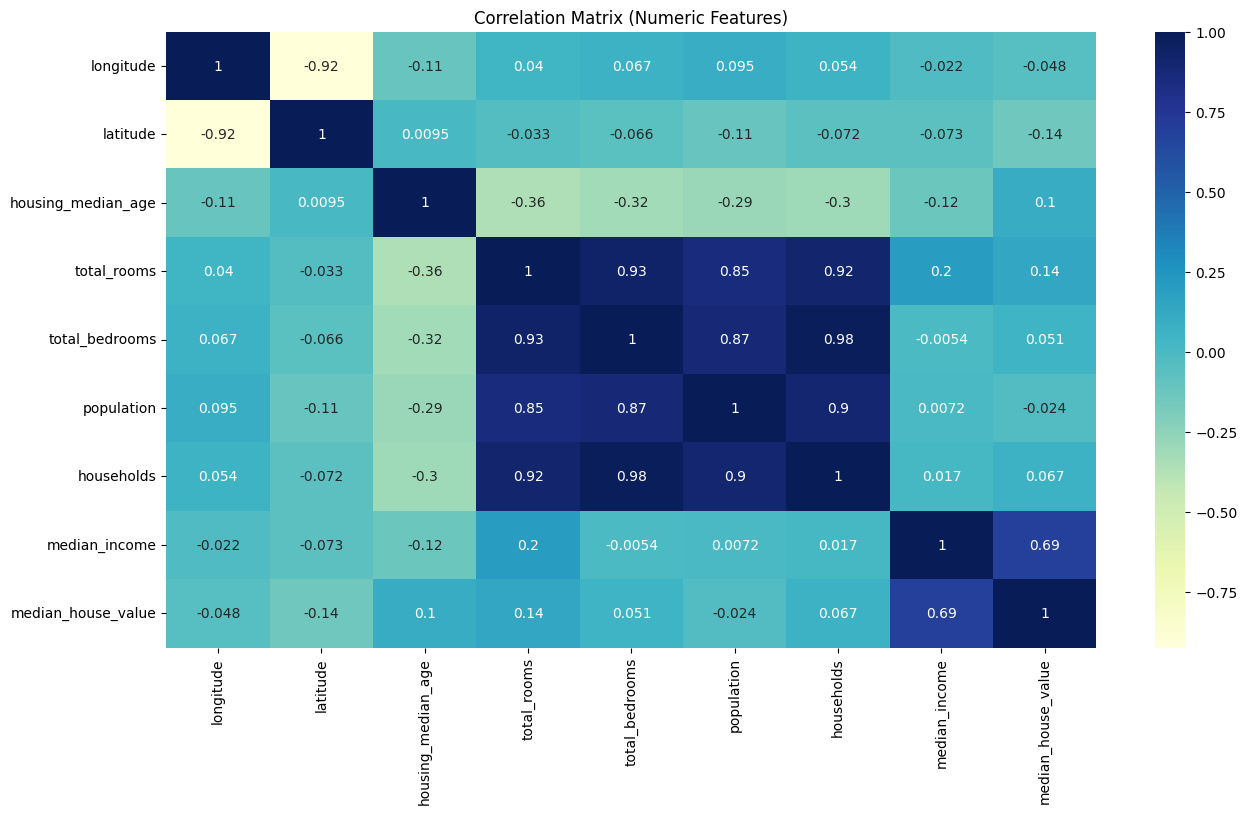

In [97]:
"""
Display a correlation heatmap for numeric features in the training data.
"""
numeric_train_data = train_data.select_dtypes(include=[np.number])
plt.figure(figsize=(15, 8))
sns.heatmap(numeric_train_data.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

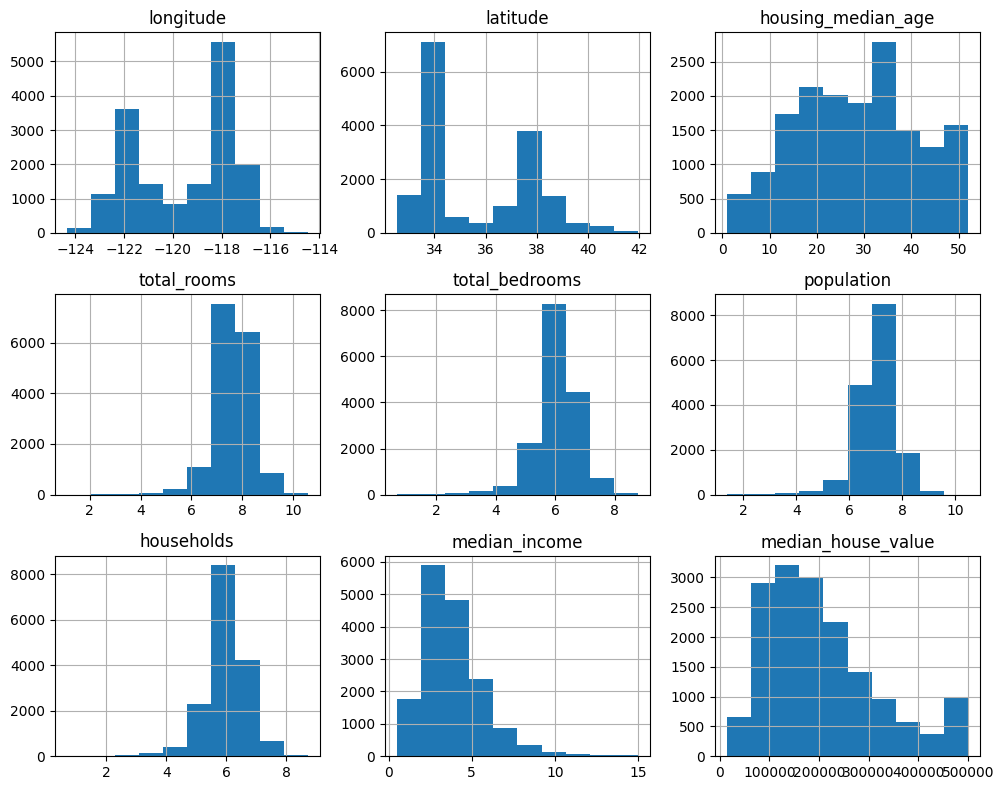

In [98]:
"""
Apply log transformation to skewed features to reduce skewness.
"""
for col in ['total_rooms', 'total_bedrooms', 'population', 'households']:
    train_data[col] = np.log(train_data[col] + 1)

train_data.hist(figsize=(10, 8))
plt.tight_layout()

In [99]:
"""
One-hot encode the 'ocean_proximity' categorical feature.
"""
ocean_dummies = pd.get_dummies(train_data['ocean_proximity'], dtype=int)
train_data = train_data.join(ocean_dummies).drop(['ocean_proximity'], axis=1)

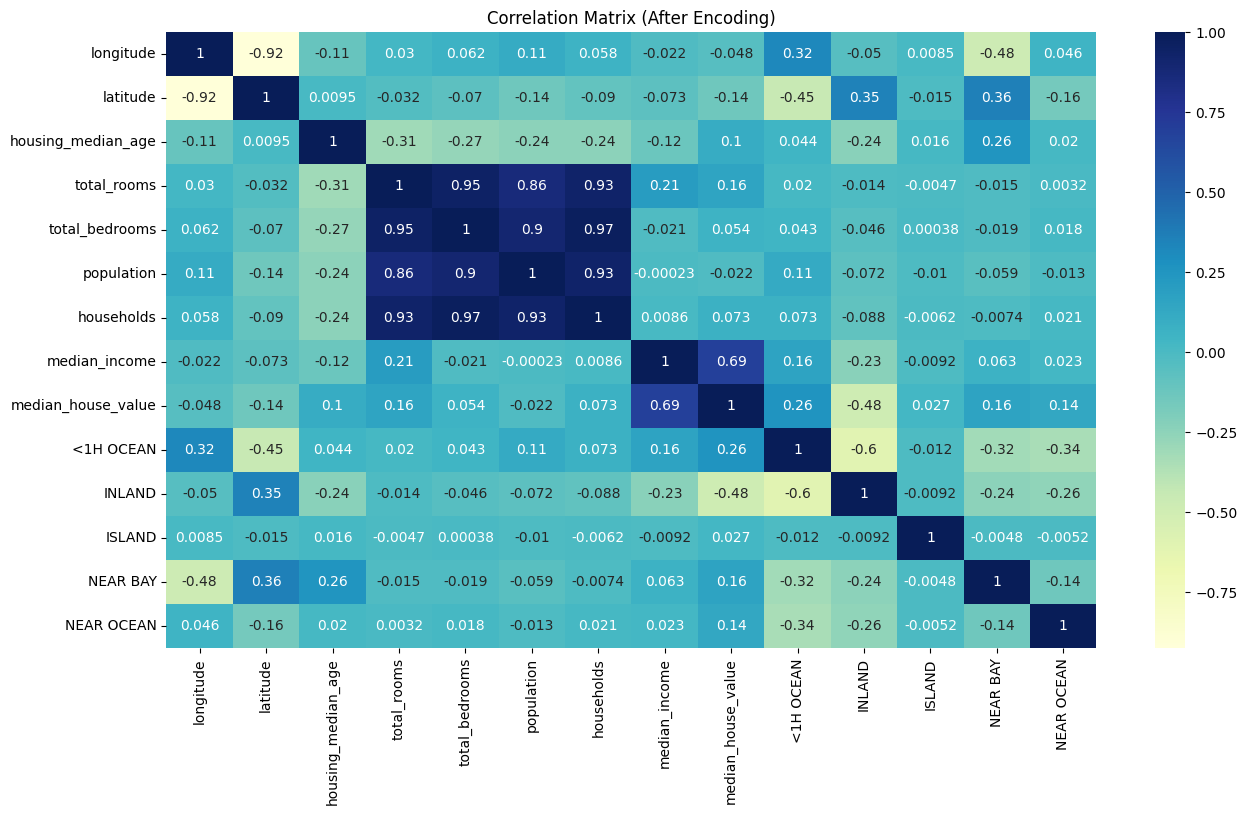

In [100]:
"""
Display a correlation heatmap after encoding categorical features.
"""
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix (After Encoding)")
plt.show()

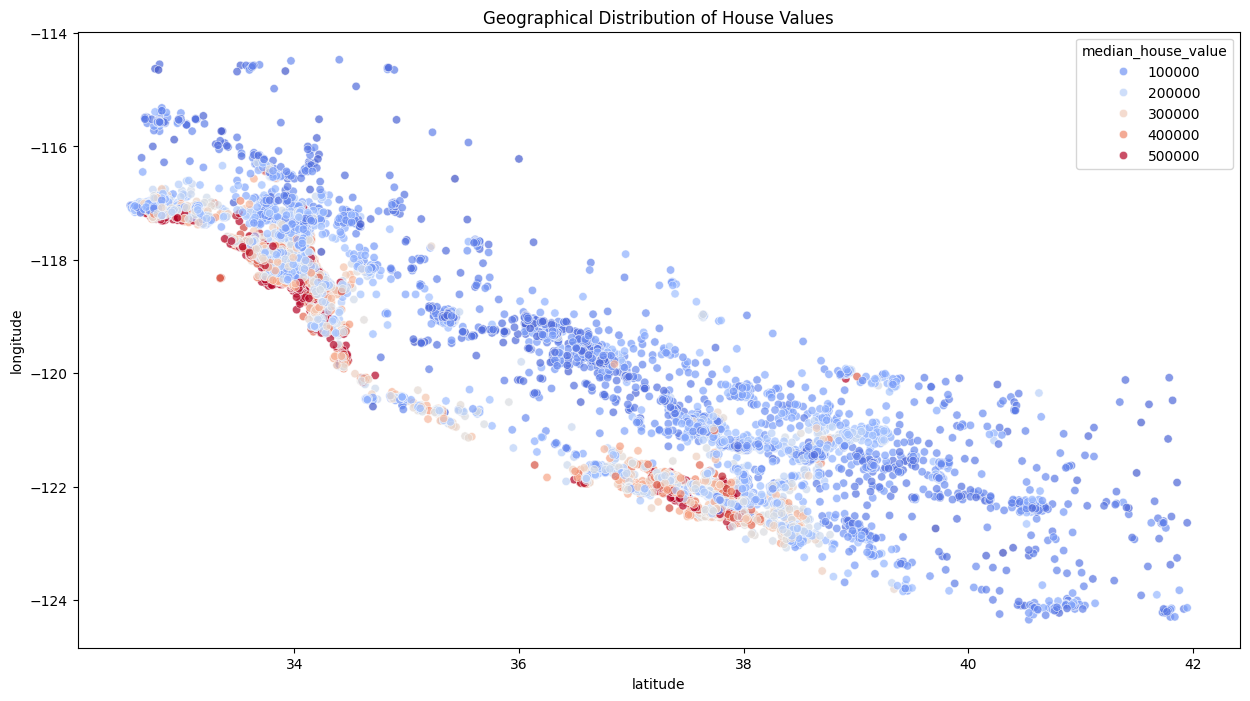

In [101]:
"""
Visualize the geographical distribution of house values using latitude and longitude.
"""
plt.figure(figsize=(15, 8))
sns.scatterplot(
    x='latitude', y='longitude', data=train_data,
    hue='median_house_value', palette='coolwarm', alpha=0.7
)
plt.title("Geographical Distribution of House Values")
plt.show()

In [102]:
"""
Create new features: bedroom_ratio and household_room for better model performance.
"""
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_room'] = train_data['total_rooms'] / train_data['households']

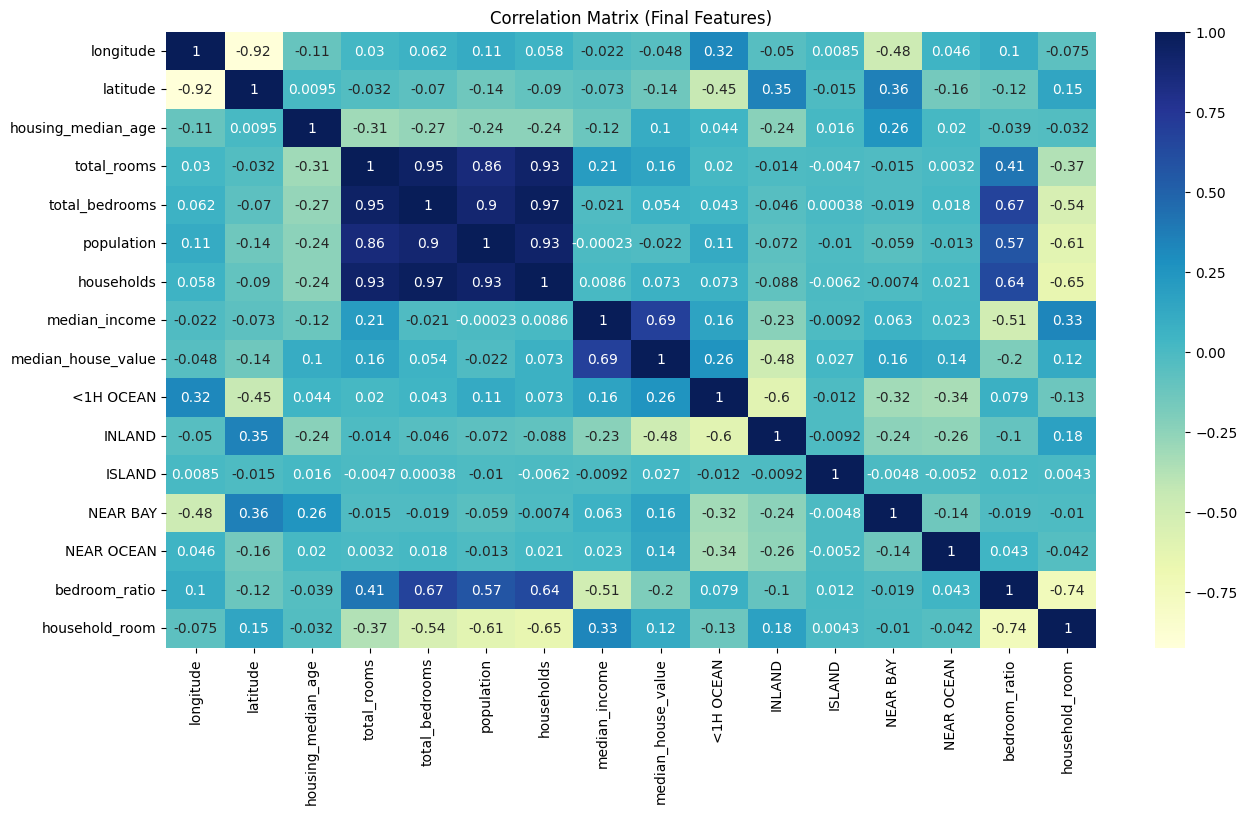

In [103]:
"""
Display the final correlation heatmap after all feature engineering steps.
"""
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix (Final Features)")
plt.show()

In [104]:
"""
Train a Linear Regression model using standardized features.
"""
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X_train = train_data.drop(['median_house_value'], axis=1)
y_train = train_data['median_house_value']

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()
reg.fit(X_train_s, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [105]:
"""
Prepare and transform the test data using the same steps as training data.
"""

test_data = X_test.join(y_test)

# Log-transform skewed features
for col in ['total_rooms', 'total_bedrooms', 'population', 'households']:
    test_data[col] = np.log(test_data[col] + 1)

# One-hot encode categorical feature
ocean_dummies_test = pd.get_dummies(test_data['ocean_proximity'], dtype=int)
test_data = test_data.join(ocean_dummies_test).drop(['ocean_proximity'], axis=1)

# Feature engineering
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_room'] = test_data['total_rooms'] / test_data['households']

In [106]:
"""
Split the prepared test data into features and target variable.
"""
X_test = test_data.drop(['median_house_value'], axis=1)
y_test = test_data['median_house_value']

In [107]:
"""
Scale the test features using the scaler fitted on training data.
"""
X_test_s = scaler.transform(X_test)

In [108]:
"""
Evaluate the performance of the Linear Regression model on the test set.
"""
print("The score of LinearRegression (scaled):", reg.score(X_test_s, y_test))

The score of LinearRegression (scaled): 0.6687407117584969


In [109]:
"""
Train a Random Forest Regressor on the standardized training data.
"""
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train_s, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [110]:
"""
Evaluate the performance of the Random Forest model on the test set.
"""
forest.score(X_test_s, y_test)

0.8187653284531543

In [111]:
"""
Perform hyperparameter tuning for Random Forest using GridSearchCV.
"""
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [5, 10, 30],
    "max_features": [2, 4, 6, 8]
}

grid_search = GridSearchCV(
    RandomForestRegressor(),
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    return_train_score=True
)
grid_search.fit(X_train_s, y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'max_features': [2, 4, ...], 'n_estimators': [5, 10, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,30


In [112]:
"""
Extract the best Random Forest model found by GridSearchCV.
"""
best_forest = grid_search.best_estimator_

In [113]:
"""
Evaluate the best Random Forest model on the test set.
"""
best_forest.score(X_test_s, y_test)

0.8162807930776501